In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cbsodata
from plotly.offline import init_notebook_mode
import plotly.io as pio
import plotly.express as px

In [2]:
data_lic_henk = pd.DataFrame(cbsodata.get_data('83488ENG', 
                        dir = 'C:/Users/Jochi/TIL6022-LabAssignments-group-11/Data')) # People with a driving licence
#data_traffic = pd.DataFrame(cbsodata.get_data('84707ENG')) # Mobility, traffic participation
#data_travel = pd.DataFrame(cbsodata.get_data('84713ENG')) # Mobility per person, travel characteristics

In [3]:
df_pop_henk = pd.DataFrame(cbsodata.get_data('7461ENG'))   # Insert dataset with population data

In [4]:
data_lic = data_lic_henk

years = list(set(data_lic.Periods.values))
years = np.sort(years)

df_pop = df_pop_henk[df_pop_henk['Periods'].isin(years)]

ages_pop = ['18 years', '19 years', '20 to 25 years', '25 to 30 years', '30 to 40 years',
            '40 to 50 years', '50 to 60 years', '60 to 65 years', '65 to 70 years', 
            '70 to 75 years', '75 to 80 years', '80 to 90 years', '90 years or older']
df_pop = df_pop[df_pop['Age'].isin(ages_pop)]
df_pop = df_pop[df_pop['Sex'] == 'Men and women']
mapping = {
            '18 years':'18 to 19 years',
            '19 years':'18 to 19 years',
            '20 to 25 years':'20 to 24 years',
            '25 to 30 years':'25 to 29 years',
            '30 to 40 years':'30 to 39 years',
            '40 to 50 years':'40 to 49 years',
            '50 to 60 years':'50 to 59 years',
            '60 to 65 years':'60 to 64 years',
            '65 to 70 years':'65 to 69 years',
            '70 to 75 years':'70 to 74 years' ,
            '75 to 80 years':'75 years or older', 
            '80 to 90 years':'75 years or older', 
            '90 years or older':'75 years or older',
}

df_pop['Age'].replace(mapping, inplace=True)

In [17]:
sorts = data_lic.CategoryDrivingLicence.values
sorts = list(set(sorts))
cars = ['Moped driving licence', 'Passenger car licence incl. trailer', 
        'Passenger car licence excl. trailer', 'Passenger car driving licence total', ]
large_cars= [x for x in sorts if x not in cars]

regions = data_lic.Region.values
regions = list(set(regions))
no_province= ['Noord-Nederland (LD)','Nederland', 'Oost-Nederland (LD)', 'Zuid-Nederland (LD)', 
              'Unclassifiable (LD)', 'West-Nederland (LD)']
provinces = [x for x in regions if x not in no_province]

ages = data_lic.AgeDrivingLicenseHolder.values
ages = list(set(ages))
ages_not = ['16 to 17 years','Age unknown', 'Total']
ages = [x for x in ages if x not in ages_not]
ages = np.sort(ages)

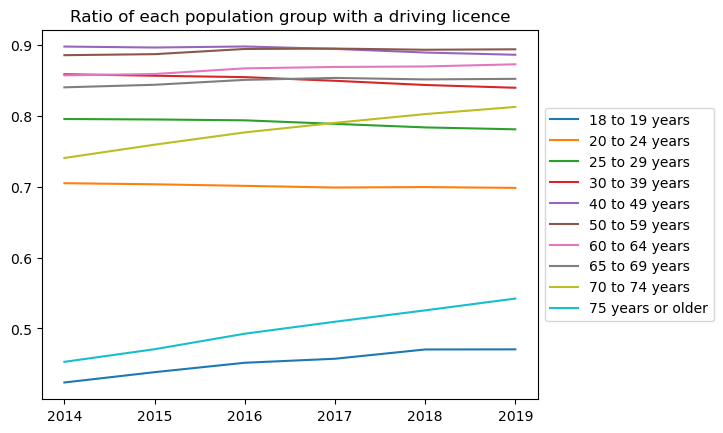

In [15]:
for i in range(len(ages)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == ages[i])
                        & (data_lic.CategoryDrivingLicence == 'Passenger car driving licence total')]
    #display(data_lic_tot)
    data_lic_tot.PeopleWithADrivingLicence_1.astype(int)
    df_pop_tot = df_pop[(df_pop.Age == ages[i])]
    df_pop_new = df_pop_tot.groupby(['Periods']).sum()
    #display(df_pop_new)
    x = np.zeros(len(df_pop_new))
    for j in range(len(df_pop_new)):
        x[j]= data_lic_tot.iloc[j, 5] / df_pop_new.iloc[j, 1]
    df_pop_new['Ratio'] = x
    plt.plot(data_lic_tot.Periods[0:6], df_pop_new.Ratio, label=ages[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Ratio of each population group with a driving licence')
plt.show()

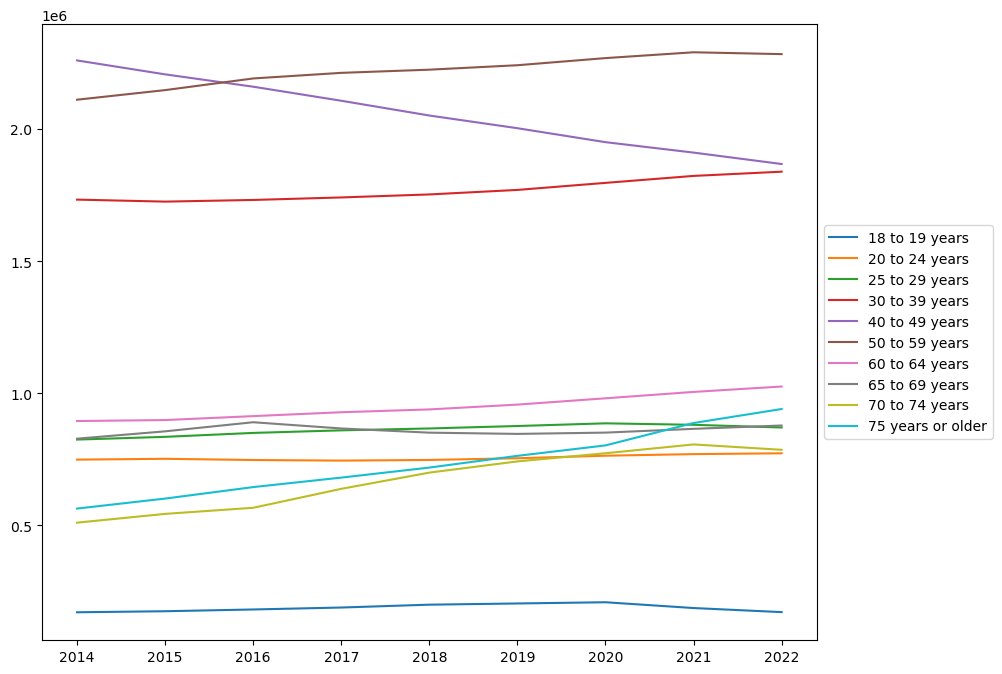

In [18]:
f = plt.figure(figsize=(10, 8))    
for i in range(len(ages)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == ages[i])
                        & (data_lic.CategoryDrivingLicence == 'Passenger car driving licence total')]
    #df_pop_tot = df_pop[(df_pop.Age == ages[i])
    #data_lic_tot['Ratio'] = data_lic_tot.PeopleWithADrivingLicence_1/ df_pop_new.TotalPopulation_1
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=ages[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.ylim()

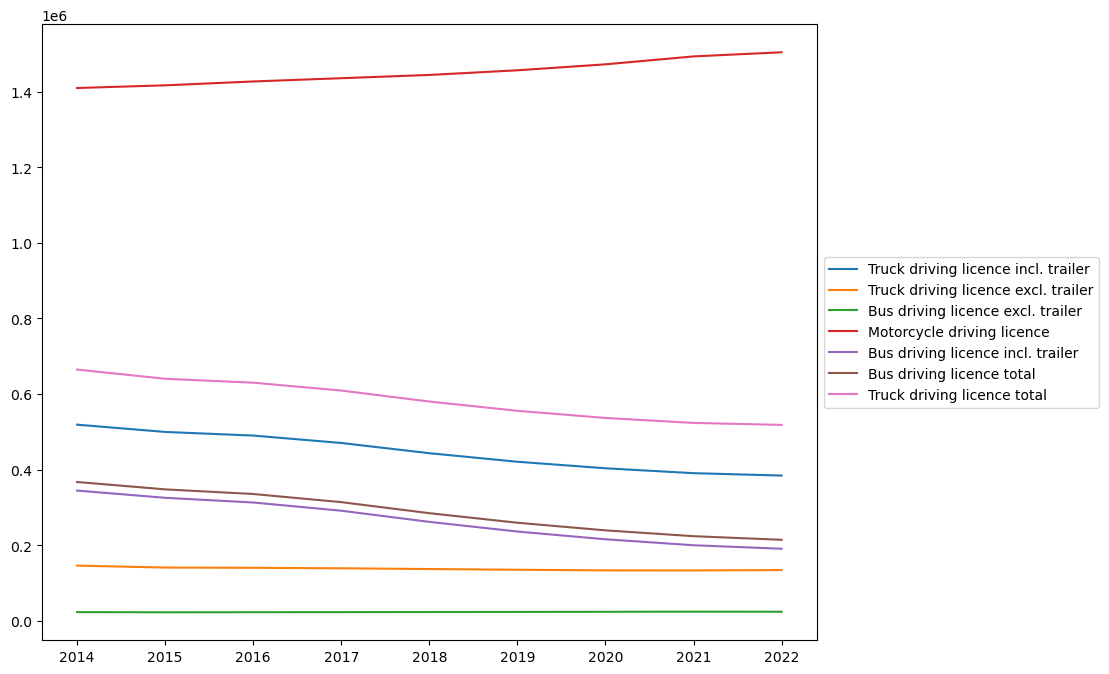

In [19]:
#data_licence.info()


#data_licence[data_licence.AgeDrivingLicenseHolder == 'Total'] 
#data_licence[(data_licence.Region == 'Nederland') & (data_licence.AgeDrivingLicenseHolder == 'Total')
  #           & (data_licence.CategoryDrivingLicence == 'Passenger car driving licence total')]
f = plt.figure(figsize=(10, 8))    
for i in range(len(large_cars)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == 'Total')
                        & (data_lic.CategoryDrivingLicence == large_cars[i])]
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=large_cars[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

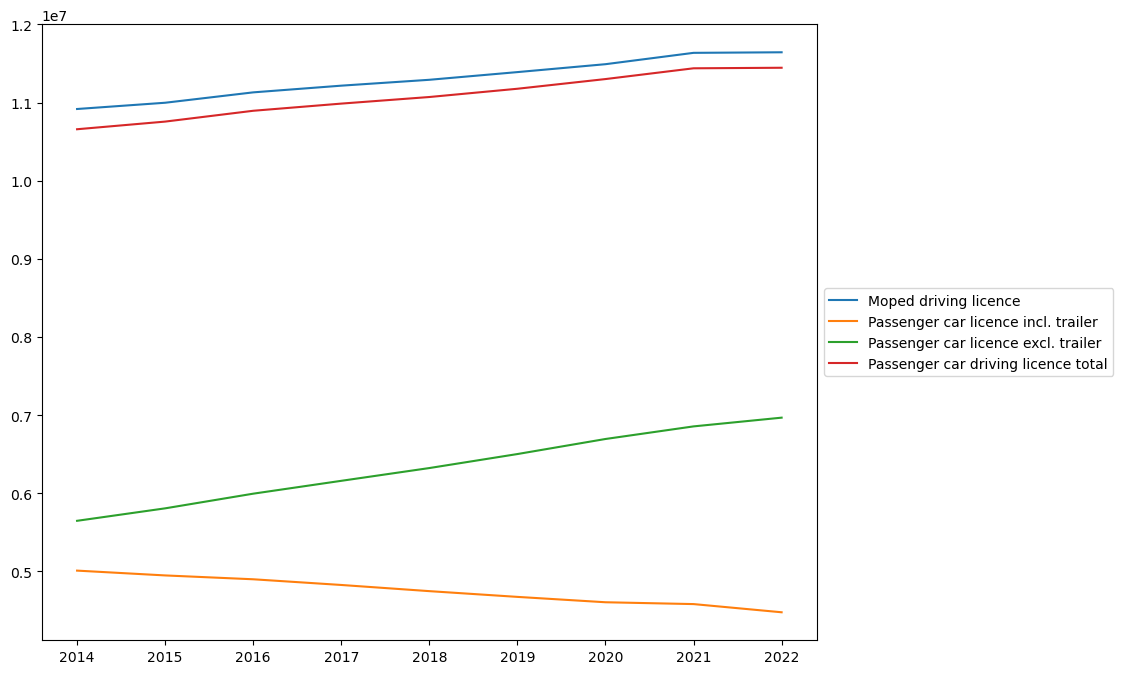

In [20]:
f = plt.figure(figsize=(10, 8))    
for i in range(len(cars)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == 'Total')
                        & (data_lic.CategoryDrivingLicence == cars[i])]
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=cars[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

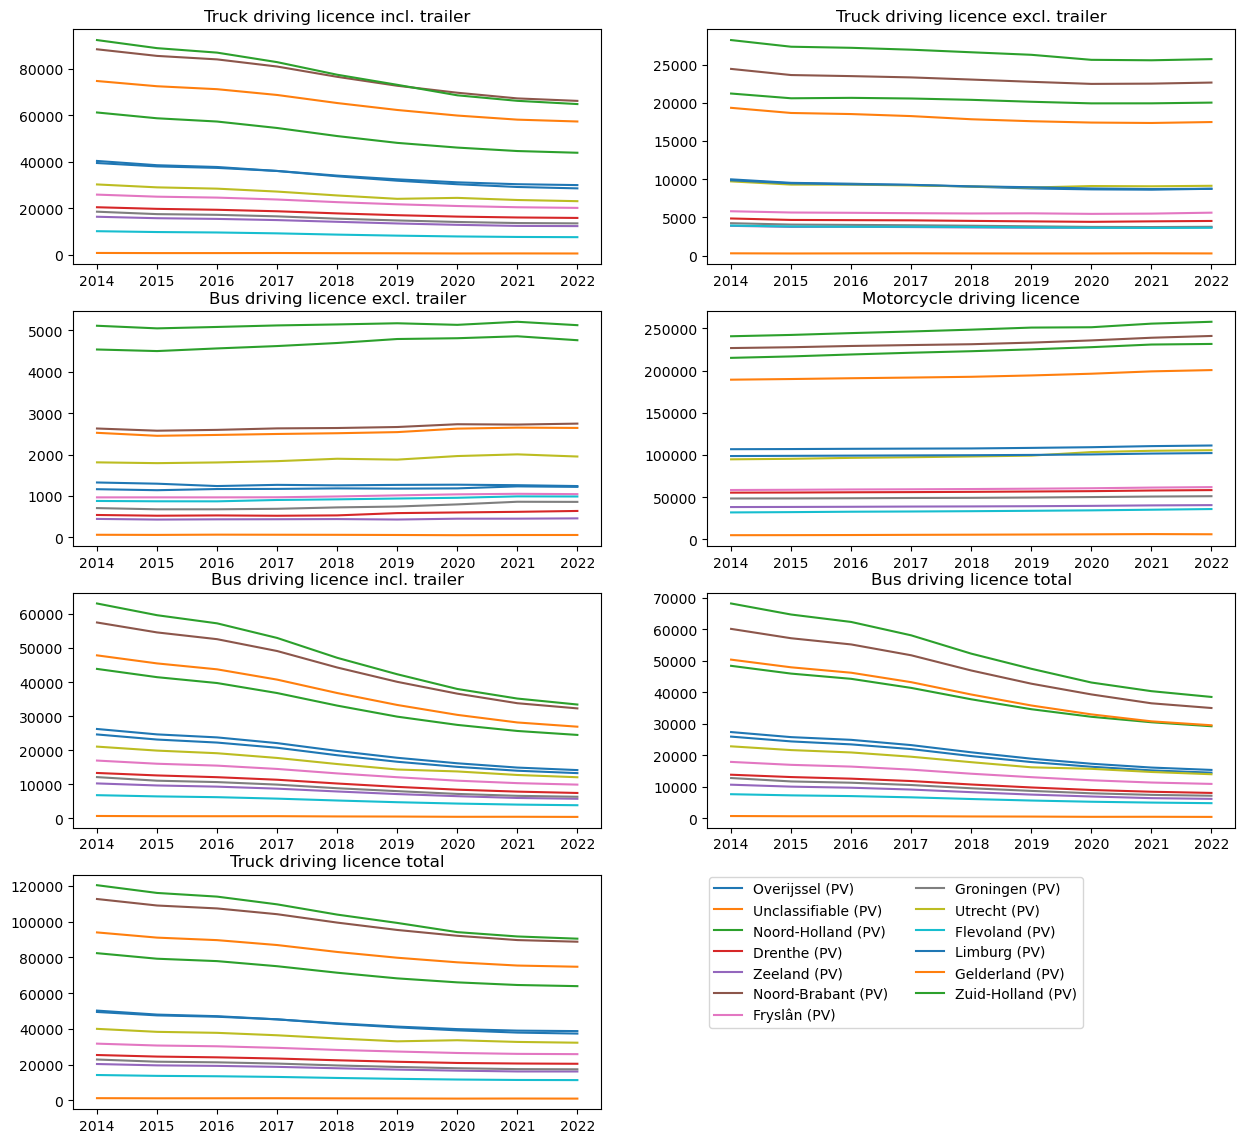

In [11]:
plt.figure(figsize=(15, 25))
for i in range(len(provinces)):
    for j in range(len(large_cars)) :
        plt.subplot(7, 2, j + 1)
        data_lic_tot = data_lic[(data_lic.Region == provinces[i])
                            & (data_lic.AgeDrivingLicenseHolder == 'Total')
                            & (data_lic.CategoryDrivingLicence == large_cars[j])]
        plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, 
                 label=f'{provinces[i]}')
        plt.title(large_cars[j])
        #plt.ylim(0, 3e5)
    plt.legend( bbox_to_anchor=(1.19, 1.02), fancybox=True, ncol=2)

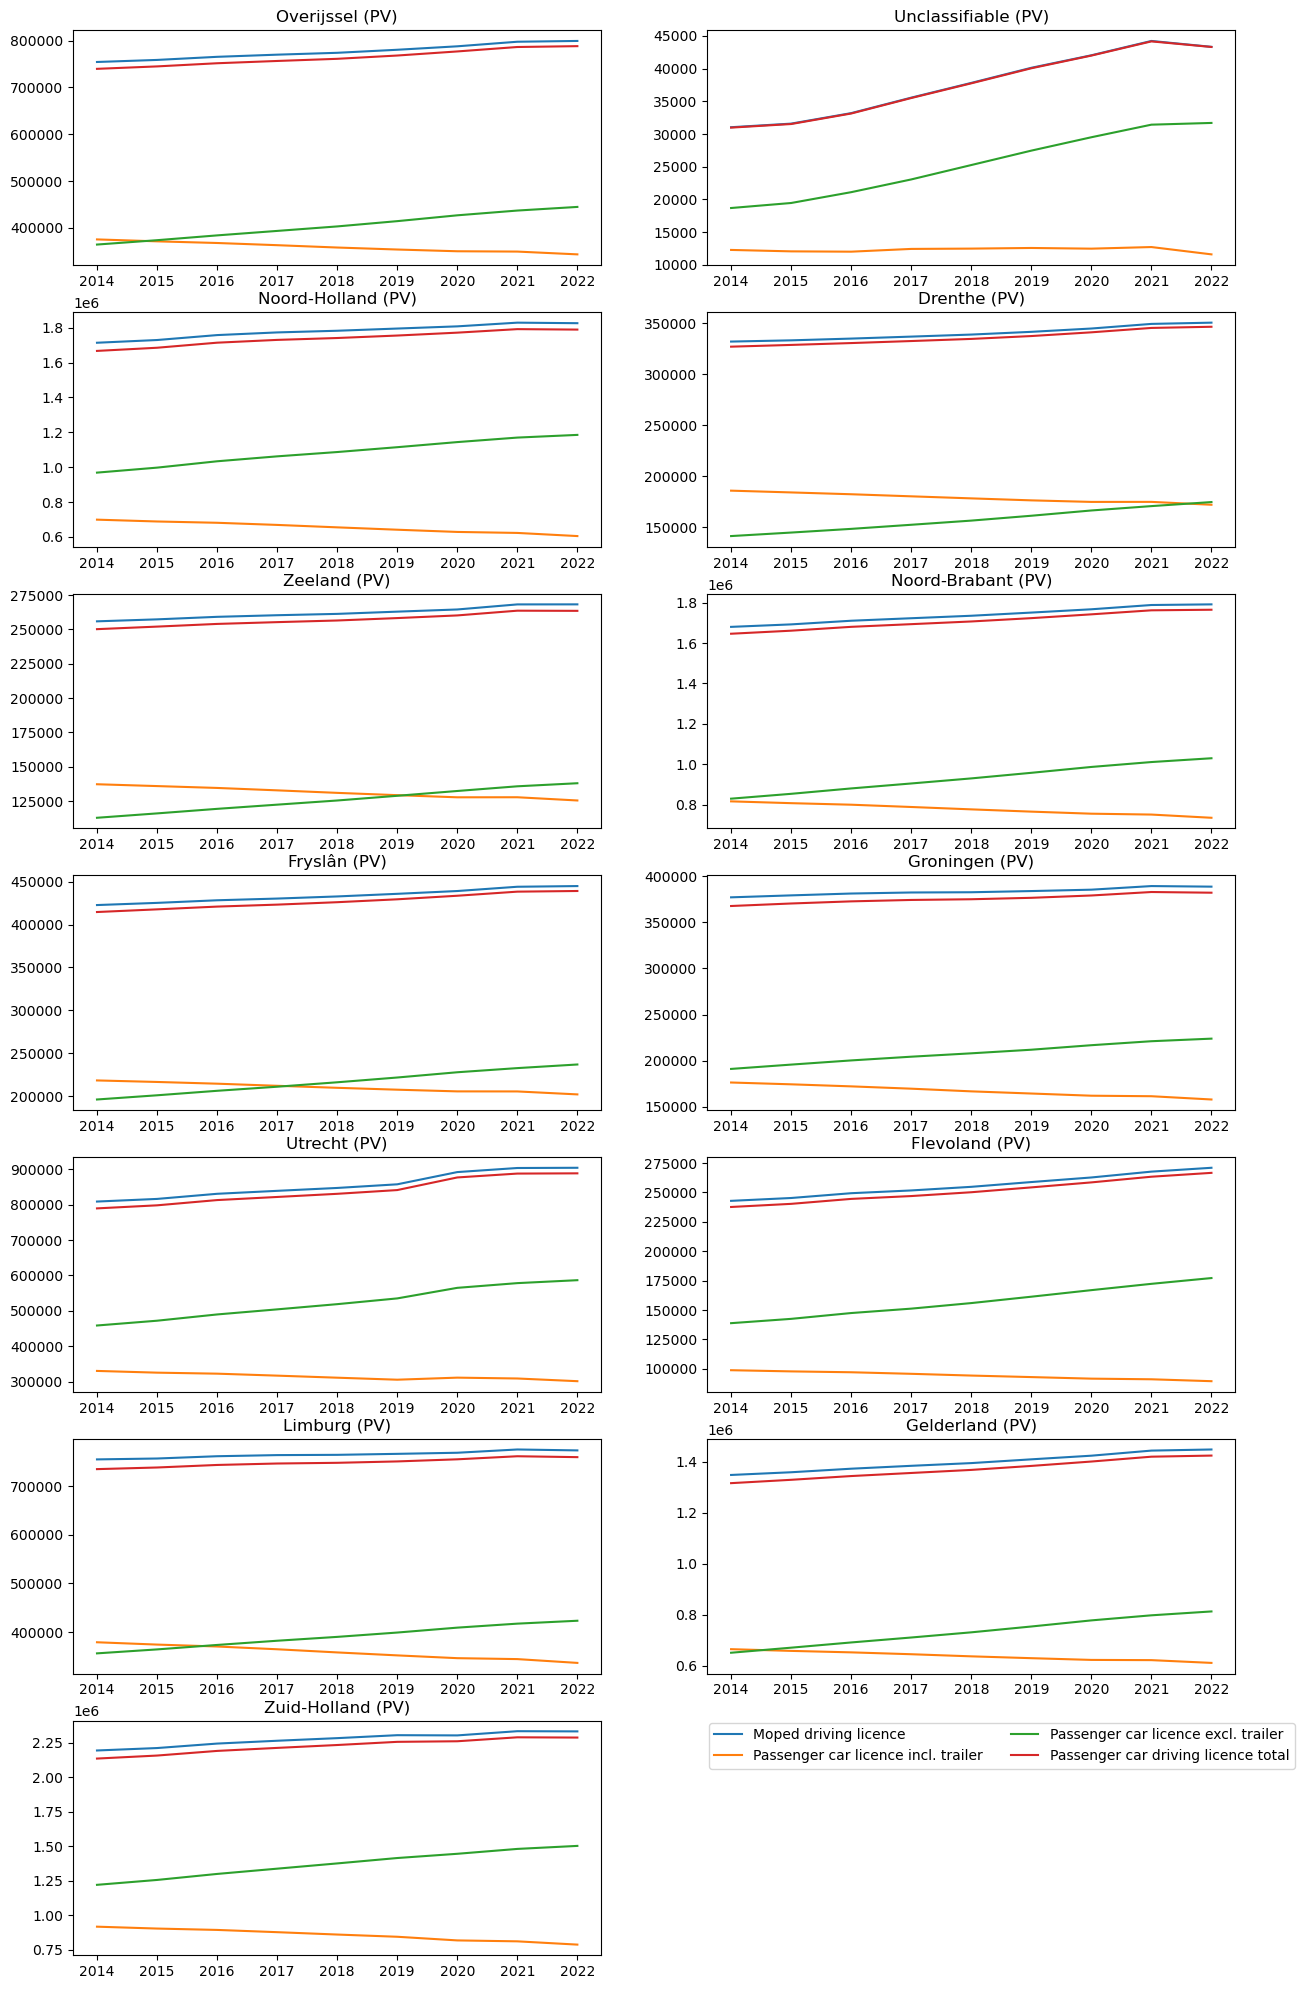

In [12]:
plt.figure(figsize=(15, 25))
for i in range(len(cars)):
    for j in range(len(provinces)) :
        plt.subplot(7, 2, j + 1)
        data_lic_tot = data_lic[(data_lic.Region == provinces[j])
                            & (data_lic.AgeDrivingLicenseHolder == 'Total')
                            & (data_lic.CategoryDrivingLicence == cars[i])]
        plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, 
                 label=f'{cars[i]}')
        plt.title(provinces[j])
    plt.legend( bbox_to_anchor=(1.19, 1.02), fancybox=True, ncol=2)